<a href="https://colab.research.google.com/github/rj21959/CodeAlpha_project/blob/main/CodeAlpha__Iris_Flower_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Irish_Flow_Classification @codealpha project_task-1 DataScience_model

In [ ]:
# 🟢 STEP 1: Upload the ZIP file
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [ ]:
# 🟢 STEP 2: Unzip the file
import zipfile
import os

zip_path = next(iter(uploaded))  # get uploaded zip file name
extract_path = './iris_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted Files:", os.listdir(extract_path))


Extracted Files: ['Iris.csv']


In [ ]:
# 🟢 STEP 3: Load the CSV file
import pandas as pd

iris_df = pd.read_csv(os.path.join(extract_path, 'Iris.csv'))
iris_df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# 🟢 STEP 4: Preprocess the Data
# Drop the Id column
iris_df.drop('Id', axis=1, inplace=True)

# Encode target labels
iris_df['Species'] = iris_df['Species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})

# Features and target
X = iris_df.drop('Species', axis=1)
y = iris_df['Species']


In [ ]:
# 🟢 STEP 5: Train-Test Split and Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# 🟢 STEP 6: Train KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



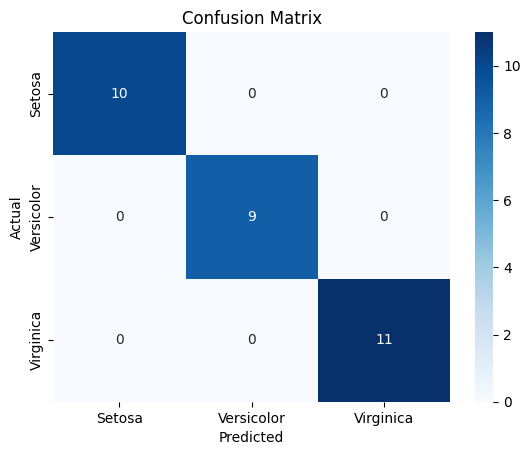

In [ ]:
# 🟢 STEP 7: Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
